# Analyzing Glassdoor salary data

In [1]:
#Import the library
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
df = pd.read_csv('glassdoor_jobs.csv')

In [3]:
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


# Data Information

In [4]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [5]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [6]:
#Displaying attributes name
print("There are 23 attributes present, that are as follows--->",list(df))

There are 23 attributes present, that are as follows---> ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [7]:
#Displaying number of attributes and tuples
row, col=df.shape
print('Total number of tuples:', row)
print('Total number of attributes:', col)

Total number of tuples: 956
Total number of attributes: 15


# Checking for Datatypes, Unique values & Missing values

In [8]:
#Checking data types
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [9]:
#Checking unique values
print ("Unique values are:\n",df.nunique())

Unique values are:
 Unnamed: 0           956
Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64


In [10]:
#To check any duplicated values to acheive better analysis by removing any duplicated values that are present
df.duplicated().sum()

0

In [11]:
#Importing to excel for saving the copy
df.to_excel('Glassdoor365.xlsx', sheet_name='Glassdoor data', index=False)

# Data Cleaning

Removing the unwanted columns

In [12]:
df=df.drop('Unnamed: 0',axis=1) 
list(df)

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors']

In [13]:
#Removing the values greater than and less than 1 if present in Rating column

In [14]:
df['Rating'].min(),df['Rating'].max()

(-1.0, 5.0)

In [15]:
#we can see that -1 value is present in the column of rating

In [16]:
df[df['Rating']==-1]['Rating'].value_counts()

-1.0    34
Name: Rating, dtype: int64

In [17]:
#Dropping values of rating less than -1
df.drop(df[df['Rating'] < 0].index,inplace=True)

In [18]:
df['Rating'].min()

1.9

Replace abnormal values with Not available number

In [19]:
#df.tail(5)

In [20]:
#Replace -1 value with Nan in salary estimate column
#df['Salary Estimate']=df['Salary Estimate'].replace('-1',np.nan)

In [21]:
#df[df['Salary Estimate']=='-1']

In [22]:
#checking replaced -1 values 
#df.loc[196:198]

# Salary column cleaning

In [23]:

#salary parsing 
#We are creatig new colum for hourly basis 
#For employee providing

df['Salary Estimate']=df['Salary Estimate'].apply(lambda x: str(x))
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
df = df[df['Salary Estimate'] != '-1'] #Not considering data if there is -1 in the rwo
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0]) #Spliting the glass door string from baraces
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$','')) #We are replacing unwated chars

In [24]:
df.loc[631:632]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
631,Data Engineer,$55K-$105K (Glassdoor est.),Who is Trace3?\n\nTrace3 is a leading Transfor...,3.4,Trace3\n3.4,"Houston, TX","Irvine, CA",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$1 to $2 billion (USD),"World Wide Technology, Presidio, Optiv",0,0
632,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1,1,0


In [25]:
# you can check that 1 is present in hour column

Create the new columns for Salary,max salary,min salary,avg salary

In [26]:
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [27]:
df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0])) #93-100=[93,100]
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [28]:
df['min_salary'].describe()

count    731.000000
mean      73.396717
std       31.252418
min       10.000000
25%       52.000000
50%       69.000000
75%       90.000000
max      202.000000
Name: min_salary, dtype: float64

In [29]:
df['min_salary'].dtype

dtype('int64')

In [30]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


# Company name column cleaning

In [31]:
#Company name text only remove rating from it
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-5], axis = 1)
#state field keep state code
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)
#age of company 
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2021 - x)
df=df.drop(df[df['Founded']==-1].index)

In [32]:
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,0,0,53,91,72.0,Tecolote Researc,NM,0,48
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,0,0,63,112,87.5,University of Maryland Medical Syste,MD,0,37
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,-1,0,0,80,90,85.0,KnowBe,FL,1,11
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNN,WA,1,56
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solution,NY,1,23
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,"Digital Realty, CoreSite, Equinix",0,0,71,119,95.0,CyrusOn,TX,1,21
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,-1,0,0,54,93,73.5,ClearOne Advantag,MD,1,13
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,-1,0,0,86,142,114.0,Logic20/2,CA,0,16
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,-1,0,0,38,84,61.0,Rochester Regional Healt,NY,1,7
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,"Clicktripz, SmarterTravel",0,0,120,160,140.0,<intent,NY,1,12


# parsing of job description (python, etc.)


In [33]:
df['Job Description'].value_counts()

Palermo Villa Inc. is interested in a high-energy, poised and confident individual to assist in the development of concepts, products and optimization projects through Palermo's vigorous consumer-driven R&D process.\nThe position will apply scientific and culinary principles in research and development. Develops the understanding of and ability to translate food trends into innovative opportunities, stimulate new food ideas and product concepts.\n\nIdentify, evaluate and develop potential new product development opportunities. From bench-top samples to commercialized products and finished product specifications\nAssist in food product formulation from bench top to commercialization using a continuously developing skill set in food formulation and processing equipment capability understanding.\nApplies an analytical approach to the solution of a wide variety of problems and assimilates the details and significance of various scientific analyses, procedures, and tests\nDemonstrates initi

In [34]:
#parsing of job description (python, etc.)

#python
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
#r studio 
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

#aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

#excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

df_out=df.copy()
df_out.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [35]:
df.R_yn.value_counts()

0    688
1      2
Name: R_yn, dtype: int64

In [36]:
df['excel'].value_counts()

1    357
0    333
Name: excel, dtype: int64

In [37]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Researc,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical Syste,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe,FL,1,11,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNN,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solution,NY,1,23,1,0,0,0,1


Exporting the file to CSV format

In [38]:
df_out.to_csv('salary_data_cleaned.csv',index = False)

Standardizing the Job title

In [42]:
## Job title and seniority
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [43]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [44]:
df[df['job_simp']=='director']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,job_simp
79,"Director, Data Science",$139K-$220K (Glassdoor est.),"Reporting to the Sr. Director, Analytics & Dat...",3.6,Grainger\n3.6,"Lake Forest, IL","Lake Forest, IL",10000+ employees,1927,Company - Public,...,Grainge,IL,1,94,1,0,0,0,1,director
411,"Director - Data, Privacy and AI Governance",$67K-$135K (Glassdoor est.),"What great looks like in this role\n\n\nData, ...",3.6,MassMutual\n3.6,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,MassMutua,MA,0,170,0,0,0,0,0,director
452,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insuranc,IL,0,109,1,0,0,0,0,director
517,"Associate Director/Director, Safety Scientist",$102K-$178K (Glassdoor est.),Who are we?\n\nAcceleron is a biopharmaceutica...,4.4,Acceleron Pharma\n4.4,"Cambridge, MA","Cambridge, MA",201 to 500 employees,2003,Company - Public,...,Acceleron Pharm,MA,1,18,0,0,0,0,1,director
524,"Director II, Data Science - GRS Predictive Ana...",$150K-$239K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insuranc,IL,0,109,1,0,0,0,0,director
533,Director Data Science,$124K-$199K (Glassdoor est.),We’re looking for a director to drive our data...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,TRANZAC,NJ,1,32,1,0,0,1,1,director
602,"Director - Data, Privacy and AI Governance",$67K-$135K (Glassdoor est.),"What great looks like in this role\n\n\nData, ...",3.6,MassMutual\n3.6,"Boston, MA","Springfield, MA",5001 to 10000 employees,1851,Company - Private,...,MassMutua,MA,0,170,0,0,0,0,0,director
675,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,Company - Private,...,Liberty Mutual Insuranc,IL,0,109,1,0,0,0,0,director
776,"Associate Director/Director, Safety Scientist",$102K-$178K (Glassdoor est.),Who are we?\n\nAcceleron is a biopharmaceutica...,4.4,Acceleron Pharma\n4.4,"Cambridge, MA","Cambridge, MA",201 to 500 employees,2003,Company - Public,...,Acceleron Pharm,MA,1,18,0,0,0,0,1,director
777,"Director, Precision Medicine Clinical Biomarke...",$136K-$208K (Glassdoor est.),ROLE SUMMARY\n\nThe Precision Medicine Clinica...,4.0,Pfizer\n4.0,"Cambridge, MA","New York, NY",10000+ employees,1849,Company - Public,...,Pfize,MA,0,172,0,0,0,1,0,director


In [45]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        477
senior    211
jr          2
Name: seniority, dtype: int64

In [47]:
df['job_state'].value_counts()

 CA             139
 MA              92
 NY              71
 VA              40
 IL              36
 MD              35
 PA              26
 TX              26
 NC              21
 WA              20
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 IN              10
 WI              10
 DC               9
 AZ               9
 AL               8
 MO               8
 MI               6
 GA               6
 KY               6
 DE               6
 CT               5
 OR               4
 NE               4
 UT               4
 IA               3
 NM               3
 KS               3
 MN               2
 ID               2
 LA               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [48]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    140
MA     92
NY     71
VA     40
IL     36
MD     35
TX     26
PA     26
NC     21
WA     20
NJ     17
FL     16
OH     14
TN     13
CO     11
WI     10
IN     10
AZ      9
DC      9
MO      8
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
OR      4
NE      4
UT      4
IA      3
NM      3
KS      3
MN      2
ID      2
LA      2
RI      1
SC      1
Name: job_state, dtype: int64

To check the description length

In [49]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
949    5025
950    6162
951    6130
952    3078
955    3673
Name: desc_len, Length: 690, dtype: int64

In [50]:
df['Competitors'].value_counts()

-1                                                                                              409
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Slalom, Cognizant Technology Solutions, Deloitte                                                  1
Greystar, The Related Companies, Prometheus Real Estate Group                                     1
Genentech, Ultragenyx Pharmaceutical, Gilead Sciences                                             1
The Nature's Bounty Co., Schiff Nutrition International                                           1


In [51]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [52]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
949    3
950    3
951    3
952    0
955    0
Name: num_comp, Length: 690, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 955
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          690 non-null    object 
 1   Salary Estimate    690 non-null    object 
 2   Job Description    690 non-null    object 
 3   Rating             690 non-null    float64
 4   Company Name       690 non-null    object 
 5   Location           690 non-null    object 
 6   Headquarters       690 non-null    object 
 7   Size               690 non-null    object 
 8   Founded            690 non-null    int64  
 9   Type of ownership  690 non-null    object 
 10  Industry           690 non-null    object 
 11  Sector             690 non-null    object 
 12  Revenue            690 non-null    object 
 13  Competitors        690 non-null    object 
 14  hourly             690 non-null    int64  
 15  employer_provided  690 non-null    int64  
 16  min_salary         690 non

In [54]:
#hourly wage to annual #63*

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [55]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


# Cleaning Revenue column and extracting average value of Revenue column 

In [56]:
df['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', '$5 to $10 million (USD)'], dtype=object)

In [57]:
lowlimit=df['Revenue'].str.split('to',n=1,expand=True)[0]

In [58]:
lower=lowlimit.str.replace('$','').replace('Unknown / Non-Applicable','0').replace('[A-Za-z+()]','',regex=True)

In [59]:
df['L']=lower.str.strip()

In [60]:
df['L'].unique()

array(['50', '2', '100', '500', '0', '1', '25', '10', '5'], dtype=object)

In [61]:
y=df['Revenue'].str.split('to',n=1,expand=True)[1]

In [62]:
df['U']=y.replace(['[A-Za-z()$]'],'',regex=True).replace(np.nan, '0').str.strip()

In [63]:
df['U']=df['U'].astype(int)
df['L']=df['L'].astype(int)

In [64]:
df['U'].unique()

array([100,   5, 500,   1,   0,   2,  50,  25,  10])

In [65]:
df['L'].unique()

array([ 50,   2, 100, 500,   0,   1,  25,  10,   5])

In [66]:
df['avg']=(df['U']+df['L'])/2

In [67]:
df['Average Revenue']=df['avg'].round().astype(int)

In [68]:
X=df['Sector'].value_counts().head(15)

In [69]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp,L,U,avg,Average Revenue
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,3.703188,1969.833333,0.034783,0.007246,74.081159,127.921739,100.131884,0.579710,51.166667,0.539130,0.002899,0.231884,0.233333,0.517391,3916.549275,1.131884,60.868116,72.894203,66.881159,66.978261
std,0.554377,54.108742,0.183362,0.084878,30.502122,45.595874,38.971381,0.493963,54.108742,0.498828,0.053799,0.422342,0.423259,0.500060,1494.761470,1.404429,135.743103,162.303749,110.811830,110.675303
min,1.900000,1744.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,688.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,1958.000000,0.000000,0.000000,52.000000,96.000000,73.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2860.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1992.000000,0.000000,0.000000,68.000000,124.000000,96.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3776.000000,0.000000,10.000000,1.000000,5.000000,5.000000
75%,4.000000,2007.000000,0.000000,0.000000,90.750000,156.500000,123.250000,1.000000,63.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4770.250000,3.000000,50.000000,25.000000,75.000000,75.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,500.000000,500.000000,300.000000,300.000000


In [70]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'L', 'U', 'avg', 'Average Revenue'],
      dtype='object')

In [71]:
df.drop(['U','L'],axis=1,inplace=True)
df.drop(['avg'],axis=1,inplace=True)

In [72]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp,Average Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,1,0,0,0,1,data scientist,na,2536,0,75
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,1,0,0,0,0,data scientist,na,4783,0,4
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,0,1,data scientist,na,3461,0,300
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,0,0,0,0,data scientist,na,3883,3,250
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,0,0,0,1,data scientist,na,2728,3,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 955
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          690 non-null    object 
 1   Salary Estimate    690 non-null    object 
 2   Job Description    690 non-null    object 
 3   Rating             690 non-null    float64
 4   Company Name       690 non-null    object 
 5   Location           690 non-null    object 
 6   Headquarters       690 non-null    object 
 7   Size               690 non-null    object 
 8   Founded            690 non-null    int64  
 9   Type of ownership  690 non-null    object 
 10  Industry           690 non-null    object 
 11  Sector             690 non-null    object 
 12  Revenue            690 non-null    object 
 13  Competitors        690 non-null    object 
 14  hourly             690 non-null    int64  
 15  employer_provided  690 non-null    int64  
 16  min_salary         690 non

Data has been cleaned

# Exploratory Data Analysis (EDA)

Data Scientist                                    118
Data Engineer                                      48
Senior Data Scientist                              34
Data Analyst                                       14
Senior Data Engineer                               14
Senior Data Analyst                                12
Lead Data Scientist                                 8
Sr. Data Engineer                                   6
Marketing Data Analyst                              6
Principal Data Scientist                            5
Machine Learning Engineer                           5
Staff Scientist-Downstream Process Development      4
Food Scientist - Developer                          4
MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB           4
Analytics Manager - Data Mart                       4
Name: Job Title, dtype: int64


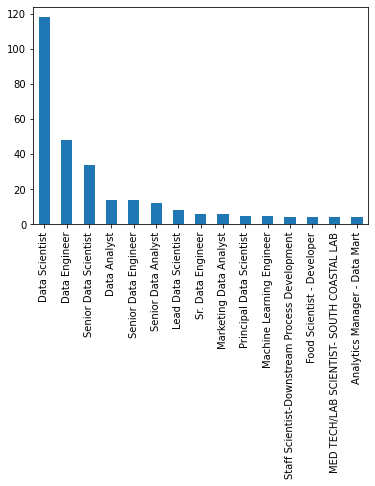

In [74]:
#gt the insights of top 15 job title from the dataser
print(df['Job Title'].value_counts().head(15))
job_title_counts=df['Job Title'].value_counts().head(15)
job_title_counts.plot.bar()
plt.show()

There are 118 data scientist profile been recorded; 
We can conclude that data scientist profile is in demand

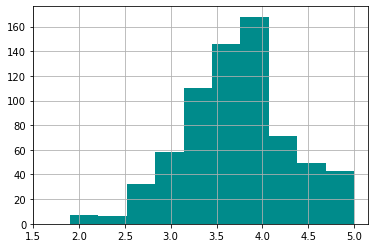

In [75]:
#Distribution of rating
df.Rating.hist(color='darkcyan')
plt.xticks([1.5,2,2.5,3,3.5,4,4.5,5])
plt.show()

In [76]:
df['company_txt'].value_counts()

Reynolds America                         14
MassMutua                                14
Takeda Pharmaceutical                    14
Software Engineering Institut            11
PNN                                      10
                                         ..
Creder                                    1
Spectrum Communications and Consultin     1
Dayton Freight Lines, Inc                 1
TrueAccor                                 1
Fivestar                                  1
Name: company_txt, Length: 318, dtype: int64

In [77]:
#checking rating of all companies
df_first=df.groupby(['company_txt'])['Rating']
df_first.first()

company_txt
1-800-FLOWERS.COM, Inc    2.8
1904lab                   4.7
23andM                    4.0
7Park Dat                 3.8
<intent                   4.6
                         ... 
comScor                   2.5
goTR                      4.2
h2o.a                     4.3
iSeat                     3.5
webfx.co                  4.7
Name: Rating, Length: 318, dtype: float64

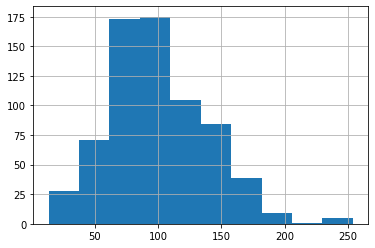

Maximum value of Average salary: 254.0


In [78]:
#Counts of average salary
df.avg_salary.hist()
plt.show()
print('Maximum value of Average salary:',df.avg_salary.max())

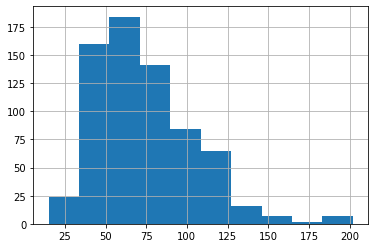

Maximum value of Minimum salary: 202


In [79]:
#Counts of minimum salary
df.min_salary.hist()
plt.show()
print('Maximum value of Minimum salary:',df.min_salary.max())

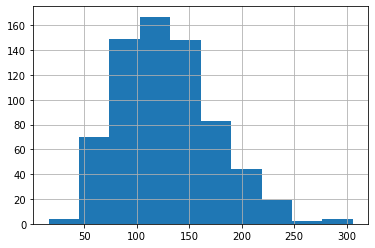

Maximum value of Maximum salary: 306


In [80]:
#Counts of maximum salary
df.max_salary.hist()
plt.show()
print('Maximum value of Maximum salary:',df.max_salary.max())

In [81]:
#Calculate total salary based on Job Title
df.groupby(['Job Title'])['min_salary','max_salary','avg_salary'].first()

,min_salary,max_salary,avg_salary
Job Title,,,
Ag Data Scientist,60,101,80.5
Analytics - Business Assurance Data Analyst,31,55,43.0
Analytics Consultant,52,81,66.5
Analytics Manager,59,116,87.5
Analytics Manager - Data Mart,42,86,64.0
...,...,...,...
System and Data Analyst,42,76,59.0
Systems Engineer II - Data Analyst,49,76,62.5
"Technology-Minded, Data Professional Opportunities",40,101,70.5


In [82]:
#Calculate total salary based on Job Title
salary_industry=df.groupby(['Industry'])['min_salary','max_salary','avg_salary'].sum()
salary_industry.to_csv('Total_Salary_Ca_based_Industry.csv')
salary_industry.head(20)

,min_salary,max_salary,avg_salary
Industry,,,
Advertising & Marketing,1916,3299,2607.5
Aerospace & Defense,1749,2993,2371.0
Architectural & Engineering Services,144,260,202.0
Auctions & Galleries,95,161,128.0
Banks & Credit Unions,619,1076,847.5
Beauty & Personal Accessories Stores,61,110,85.5
Biotech & Pharmaceuticals,8492,15296,11857.0
Brokerage Services,182,334,258.0
Colleges & Universities,993,1871,1432.0


In [83]:
#Calculate total salary based on Job Title
salary_company=df.groupby(['Company Name'])['min_salary','max_salary','avg_salary'].sum()
salary_company.to_csv('Total_Salary_Ca_based_company.csv')
salary_company.head(20)

,min_salary,max_salary,avg_salary
Company Name,,,
"1-800-FLOWERS.COM, Inc.\n2.8",55,98,76.5
1904labs\n4.7,222,352,287.0
23andMe\n4.0,59,125,92.0
7Park Data\n3.8,89,153,121.0
<intent>\n4.6,240,320,280.0
AVANADE\n3.9,60,114,87.0
AXION Healthcare Solutions\n3.6,94,170,132.0
Acceleron Pharma\n4.4,204,356,280.0
Accuride International\n3.6,82,133,107.5


In [84]:
#Calculate total salary based on Job Title
salary_location=df.groupby(['Location'])['min_salary','max_salary','avg_salary'].sum().reset_index()
salary_location.to_csv('Total_Salary_Ca_based_location.csv')
salary_location.head(20)

,Location,min_salary,max_salary,avg_salary
0,"Agoura Hills, CA",70,132,101.0
1,"Alabaster, AL",29,50,39.5
2,"Alameda, CA",130,245,187.5
3,"Albuquerque, NM",165,281,223.0
4,"Alexandria, VA",100,184,142.0
5,"Aliso Viejo, CA",158,294,226.0
6,"Allendale, NJ",52,113,82.5
7,"Ann Arbor, MI",120,140,130.0
8,"Annapolis Junction, MD",180,381,280.5
9,"Arlington, VA",266,450,358.0


In [85]:
#Calculate total salary based on Job Title
salary_seniority=df.groupby(['seniority'])['min_salary','max_salary','avg_salary'].sum()
salary_seniority.to_csv('Total_Salary_Ca_based_seniority.csv')
salary_seniority.head(20)

,min_salary,max_salary,avg_salary
seniority,,,
jr,118,208,163.0
na,32090,56016,43480.0
senior,18908,32042,25448.0


In [86]:
#Calculate total salary based on Job Title
salary_founded=df.groupby(['Founded'])['min_salary','max_salary','avg_salary'].sum().reset_index()
salary_founded.to_csv('Total_Salary_Ca_based_founded.csv')
salary_founded.head(20)

,Founded,min_salary,max_salary,avg_salary
0,1744,95,161,128.0
1,1781,1320,2384,1852.0
2,1812,94,139,116.5
3,1830,240,460,350.0
4,1846,170,268,219.0
5,1849,638,1058,848.0
6,1850,70,122,96.0
7,1851,982,1835,1408.5
8,1852,340,557,448.5
9,1856,86,164,125.0


In [87]:
#Calculate total salary based on Job Title
salary_size=df.groupby(['Size'])['min_salary','max_salary','avg_salary'].sum().reset_index()
salary_size.to_csv('Total_Salary_Ca_based_size.csv')
salary_size.head(20)

,Size,min_salary,max_salary,avg_salary
0,1 to 50 employees,1314,2175,1665.0
1,10000+ employees,10543,17831,14117.0
2,1001 to 5000 employees,10333,18044,13937.5
3,201 to 500 employees,7847,13939,10893.0
4,5001 to 10000 employees,5276,9325,7232.5
5,501 to 1000 employees,8508,14784,11551.5
6,51 to 200 employees,7295,12168,9694.5


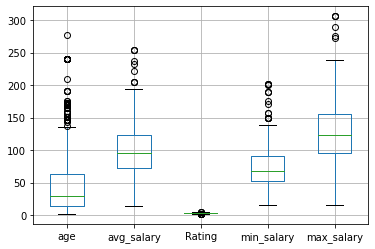

In [88]:
#To check the distribution of values
df.boxplot(column = ['age','avg_salary','Rating','min_salary','max_salary'])
plt.show()

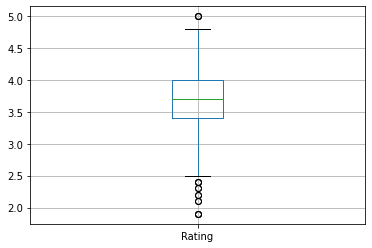

In [89]:
df.boxplot(column = 'Rating')
plt.show()

In [90]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.032270,-0.108796,0.148882
avg_salary,0.032270,1.000000,0.129638,0.107366
Rating,-0.108796,0.129638,1.000000,-0.102428
desc_len,0.148882,0.107366,-0.102428,1.000000


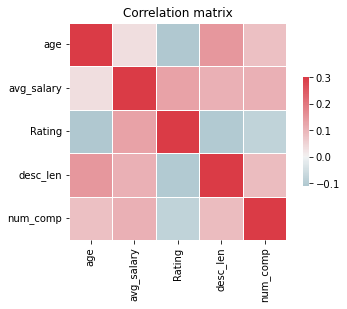

In [91]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix')
plt.show()


<Figure size 1296x864 with 0 Axes>

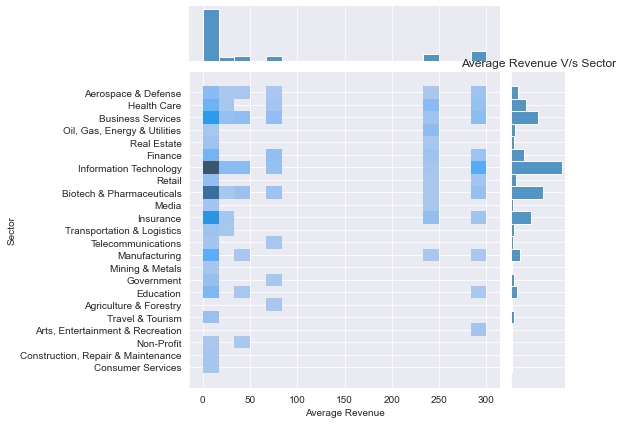

In [93]:
plt.figure(figsize=(18,12))
sns.set_style('darkgrid')
sns.jointplot(data=df,x='Average Revenue',y='Sector',kind='hist')
plt.title('Average Revenue V/s Sector')
plt.show()

In [94]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'Average Revenue'],
      dtype='object')

In [95]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for: Location, total: 186


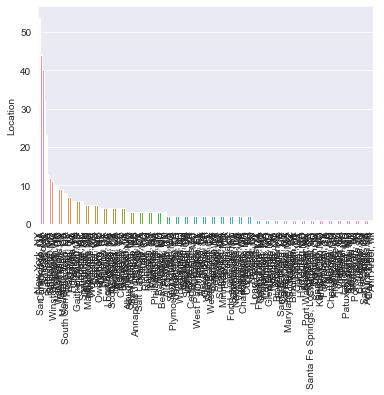

graph for: Headquarters, total: 180


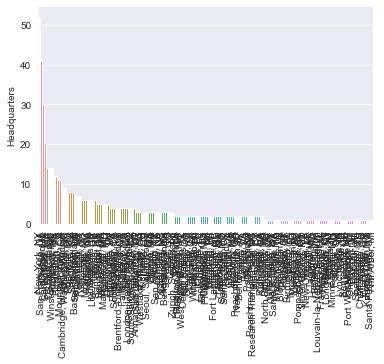

graph for: Size, total: 7


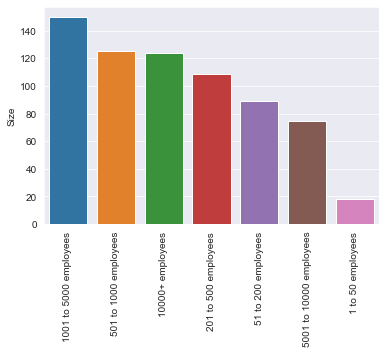

graph for: Type of ownership, total: 10


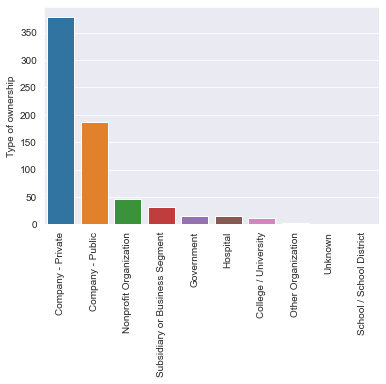

graph for: Industry, total: 56


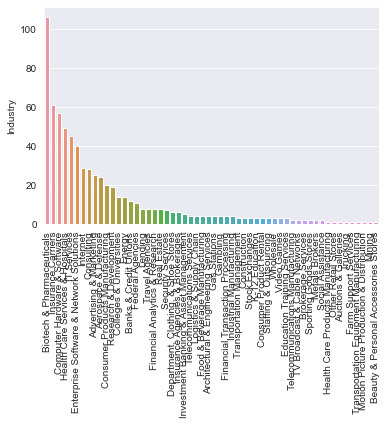

graph for: Sector, total: 23


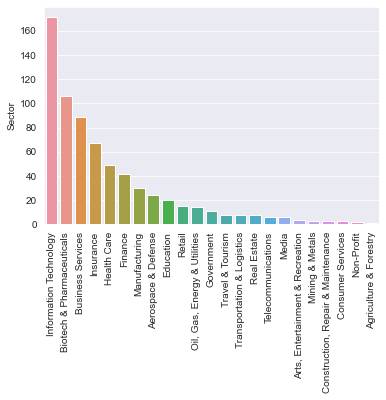

graph for: Revenue, total: 12


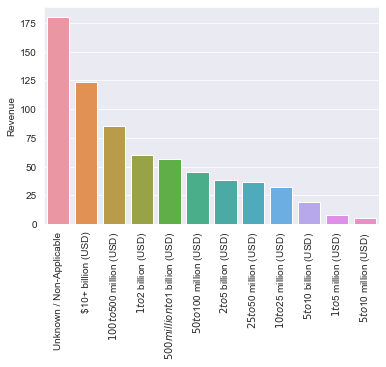

graph for: company_txt, total: 318


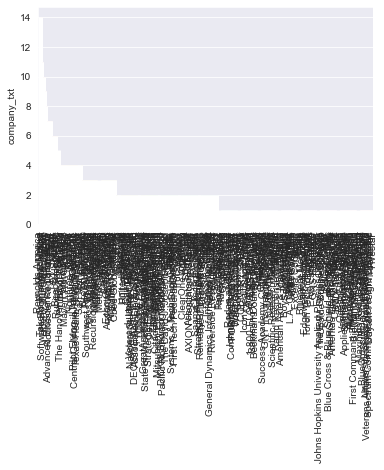

graph for: job_state, total: 37


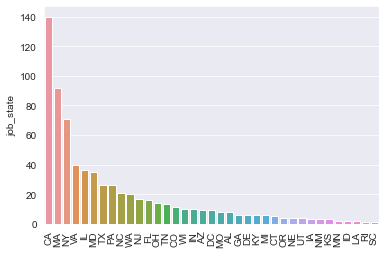

graph for: same_state, total: 2


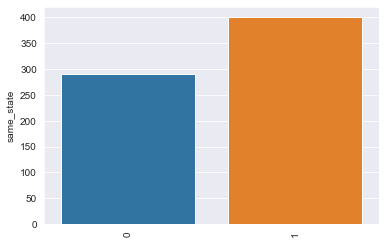

graph for: python_yn, total: 2


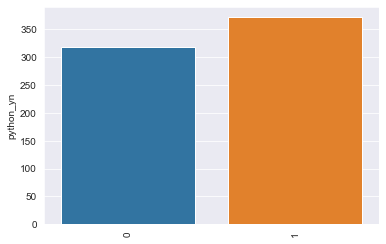

graph for: R_yn, total: 2


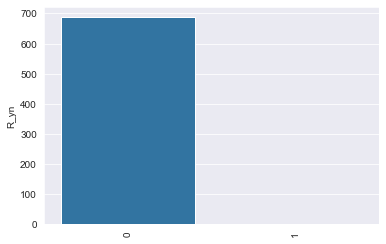

graph for: spark, total: 2


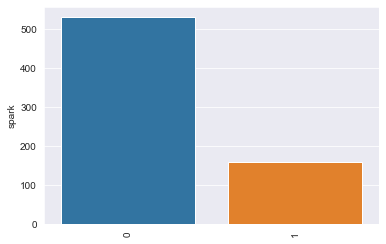

graph for: aws, total: 2


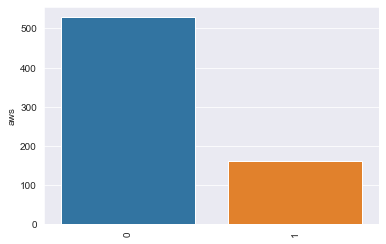

graph for: excel, total: 2


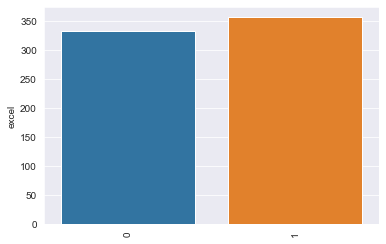

graph for: job_simp, total: 7


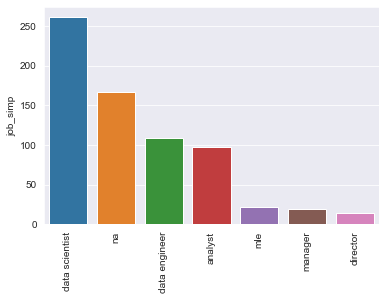

graph for: seniority, total: 3


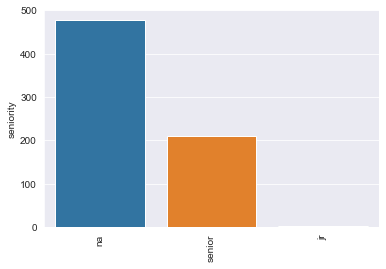

In [96]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for: %s, total: %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


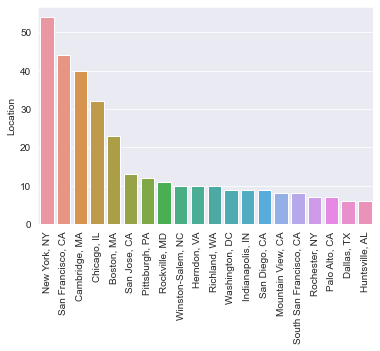

graph for Headquarters: total = 20


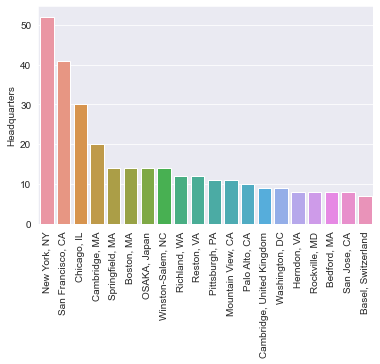

graph for company_txt: total = 20


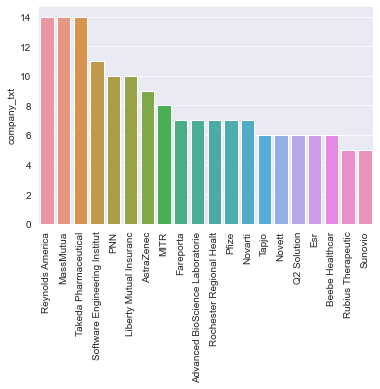

In [208]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Applying Pivot table and finding the hidden insights

In [97]:
pd.pivot_table(df, index = 'job_simp', values = ['avg_salary','min_salary','max_salary'])

,avg_salary,max_salary,min_salary
job_simp,,,
analyst,66.306122,85.806122,47.357143
data engineer,106.188073,135.422018,76.954128
data scientist,116.509579,144.344828,88.674330
director,168.607143,208.214286,129.000000
manager,79.973684,105.315789,54.631579
mle,126.431818,162.500000,90.363636
na,83.520958,113.359281,60.544910


In [98]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = ['avg_salary','min_salary','max_salary'])

avg_salary  max_salary  min_salary
job_simp       seniority                                    
analyst        jr          56.500000   76.000000   37.000000
               na          61.514286   79.442857   43.585714
               senior      79.092593  102.666667   57.518519
data engineer  na          97.189189  125.283784   69.094595
               senior     125.214286  156.857143   93.571429
data scientist jr         106.500000  132.000000   81.000000
               na         105.985380  132.163743   79.807018
               senior     136.842697  167.887640  105.797753
director       na         168.607143  208.214286  129.000000
manager        na          79.973684  105.315789   54.631579
mle            na         119.133333  152.400000   85.866667
               senior     142.071429  184.142857  100.000000
na             na          71.855263   99.842105   53.921053
               senior     108.613208  142.433962   74.792453

In [99]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = ['avg_salary','min_salary','max_salary']).sort_values('job_state', ascending = True)

avg_salary  max_salary  min_salary
job_state job_simp                                          
AL        analyst          62.200000   79.800000        44.6
          data engineer    65.000000   86.000000        44.0
          na               43.750000   57.500000        30.0
AZ        analyst          55.000000   71.000000        39.0
          data engineer    79.500000   91.800000        67.2
...                              ...         ...         ...
WA        analyst          54.500000   70.000000        39.0
          na               97.500000  130.000000        65.0
WI        data scientist  113.500000  141.000000        86.0
          analyst          58.833333   75.666667        42.0
          na               54.000000   68.000000        40.0

[110 rows x 3 columns]

In [100]:
pd.options.display.max_rows = 999
pd.set_option('display.max_rows', 999)

In [101]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          16
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer            9
          analyst                  6
UT        data scientist           3
          analyst                  1
TX        na                       7
          data scientist          11
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        na                       8
          mle                      7
          data scientist           3
          analyst                  8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          39
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          director                 2
          manager                  2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           2
          analyst                  2
MN        analyst                  1
          data engineer            1
MI        data scientist           4
          manager                  2
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      37
          manager                  5
          director                 6
          data scientist          29
          data engineer           11
          analyst                  4
LA        na                       1
          analyst                  1
KY        data scientist           2
          na                       4
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        na                       2
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
          analyst                  3
ID        analyst                  2
IA        data engineer            1
          analyst                  2
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           3
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        data scientist           3
          analyst                  1
          data engineer            3
          mle                      1
          na                       3
CA        na                      23
          mle                      5
          manager                  9
          data scientist          61
          data engineer           25
          analyst                 17
AZ        data scientist           1
          data engineer            5
          analyst                  1
          na                  

In [102]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,145.000000
MO,143.500000
CA,141.352459
UT,140.500000
IL,117.233333
NC,117.000000
NY,115.371795
MA,114.431034
WI,113.500000


In [103]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'Average Revenue'],
      dtype='object')

In [107]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),43.0,42.0
$2 to $5 billion (USD),17.0,21.0
$25 to $50 million (USD),21.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),5.0,NaN


In [227]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

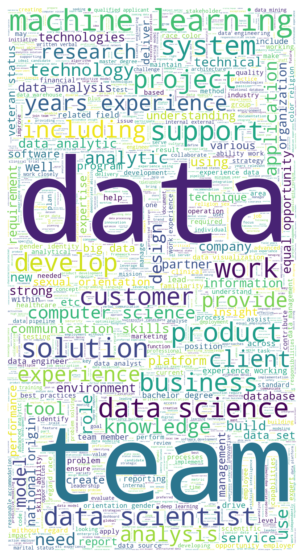

In [127]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [128]:
df.to_csv('eda_data.csv')

Data Cleaning, Exploratory Data Analysis, Data Visulaization are done and Cleaned Data has been converted to "eda_data"